In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lyv = pd.read_csv('livenation.csv', index_col='Date', parse_dates=True)
lyv = lyv.asfreq('A')
lyv

,Revenue,Operating Expenses,Operating Income,Net income
Date,,,,
2012-12-31,5819047,5840686,-21639,-161897
2013-12-31,6478547,6338887,139660,-36015
2014-12-31,6866964,6859800,7164,-104450
2015-12-31,7245731,7114359,131372,-15769
2016-12-31,7826336,7631396,194940,20297
2017-12-31,9687222,9595825,91397,7774
2018-12-31,10787800,10515264,272536,90340
2019-12-31,11547969,11223125,324844,118212
2020-12-31,1861178,3514370,-1653192,-1827790


In [3]:
lyv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2012-12-31 to 2021-12-31
Freq: A-DEC
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Revenue             10 non-null     int64
 1   Operating Expenses  10 non-null     int64
 2   Operating Income    10 non-null     int64
 3   Net income          10 non-null     int64
dtypes: int64(4)
memory usage: 400.0 bytes


In [4]:
lyv.describe()

,Revenue,Operating Expenses,Operating Income,Net income
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,7.438924e+06,7.532002e+06,-9.307760e+04,-2.518084e+05
std,2.782808e+06,2.322843e+06,5.854203e+05,5.905399e+05
min,1.861178e+06,3.514370e+06,-1.653192e+06,-1.827790e+06
25%,6.320972e+06,6.425742e+06,-1.443825e+04,-1.475352e+05
50%,7.056348e+06,6.987080e+06,1.113845e+05,-2.589200e+04
75%,9.222000e+06,9.104718e+06,1.811200e+05,1.716625e+04
max,1.154797e+07,1.122312e+07,3.248440e+05,1.182120e+05


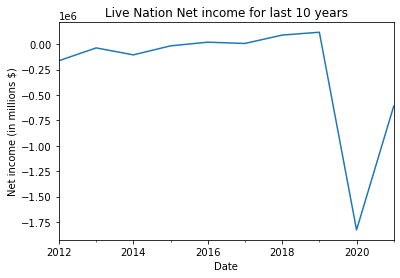

In [5]:
lyv['Net income'].plot(title= 'Live Nation Net income for last 10 years', 
                       ylabel= 'Net income (in millions $)');

No trend or seasonality in this data.

In [6]:
alpha = 0.2
model = SimpleExpSmoothing(lyv['Net income']).fit(alpha)
test_predictions = model.forecast(1).rename ('2022 Forecast')

/Users/jayalakshmijain/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [7]:
test_predictions

2022-12-31   -416229.763738
Freq: A-DEC, Name: 2022 Forecast, dtype: float64

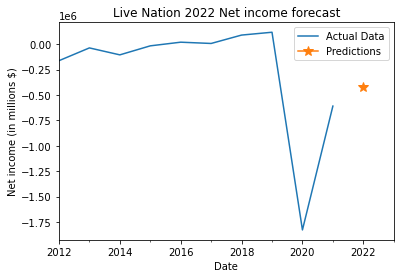

In [8]:
lyv['Net income'].plot(legend=True,label='Actual Data');
test_predictions.plot(legend=True,label='Predictions', marker="*",markersize=10);
plt.xlim(pd.Timestamp('2012-12-31'), pd.Timestamp('2023-07-01'));
plt.title('Live Nation 2022 Net income forecast');
plt.ylabel('Net income (in millions $)');
plt.legend();

Forecasting Write Up:

The data used in this file was obtained from 10-K annual reports filed by Live Nation. 10 years worth of net income data was extracted to feed into our forecasting model. An upward trend can be seen from 2012-2019. However, 2020-21 numbers are anomalous compared to the previous 8 years which is probably due to the effects of COVID. There is no overall trend. There are no repeating patterns observed at regular intervals, hence no overall seasonality observed. This makes it ideal to use Simple Exponential Smoothing to forecast the 2022 net income. We set the alpha at 0.2 to account for potential recovery in 2022 while placing some importance on recent changes due to COVID. The closer the alpha is to 1, the more weight on recent observations (when alpha = 1, 2022 forecast is same as 2021 net income). The closer alpha is to 0, the more the forecast shows long term tendency of the time series (when alpha = 0, 2022 forecast is mean of net income 2012-2021). Using the forecasting model, we determined that the predicted net income for 2022 is -416229.763. The entertainment industry took a big hit during COVID-19 epidemic (as seen in 2020, 2021 net loss). However, with restrictions and mandates beginning to relax, we see signs of recovery in the industry. With people resuming travelling, artists going back on tour, resumping live sporting event and more, we expect Live Nation to have a positive net income by the end of 2023.
